In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [4]:
%matplotlib inline

/tmp/ipykernel_3136581/1198020877.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.3, 1, 1])  # Adjust this to fit everything nicely


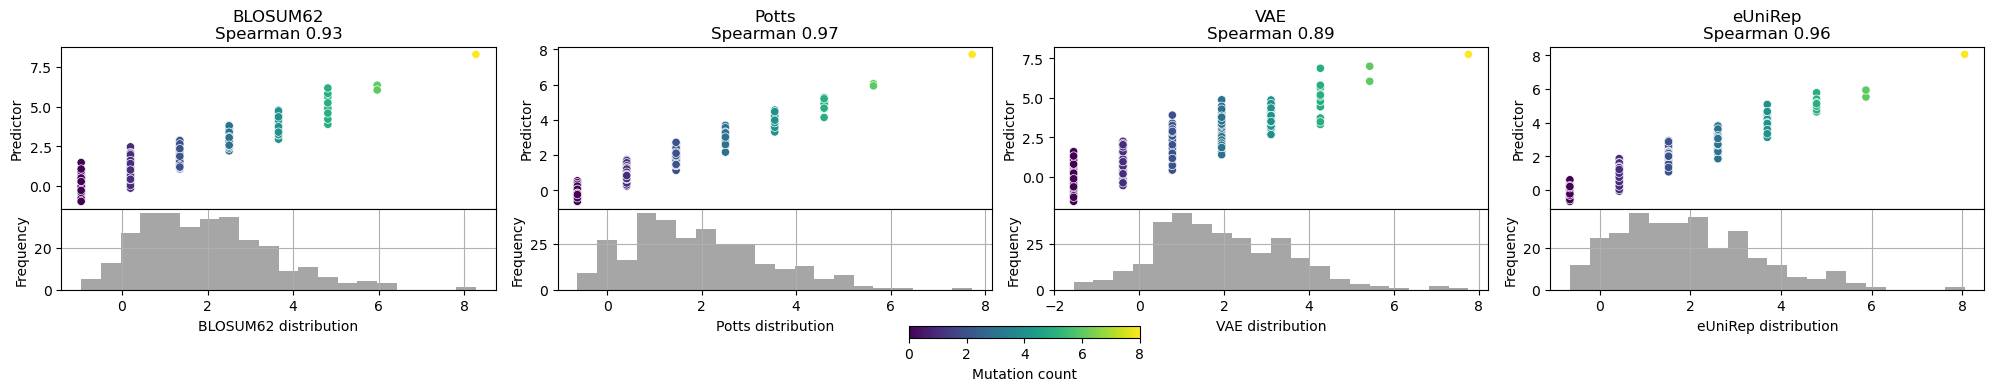

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Simulate data
np.random.seed(42)
data = {
    'Mutation count': np.random.poisson(2, 300),
    'Fitness': np.random.normal(loc=0, scale=1, size=300)
}
df = pd.DataFrame(data)
df['BLOSUM62'] = df['Mutation count'] + np.random.normal(0, 0.5, size=300)
df['Potts'] = df['Mutation count'] + np.random.normal(0, 0.3, size=300)
df['VAE'] = df['Mutation count'] + np.random.normal(0, 0.7, size=300)
df['eUniRep'] = df['Mutation count'] + np.random.normal(0, 0.4, size=300)

# Calculate Spearman correlation for each predictor
predictor_columns = ['BLOSUM62', 'Potts', 'VAE', 'eUniRep']
correlations = {col: spearmanr(df['Mutation count'], df[col]).correlation for col in predictor_columns}

# Create the plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1, 1, 1]})

# Define the colormap
cmap = sns.color_palette("viridis", as_cmap=True)

for ax, col in zip(axes, predictor_columns):
    points = sns.scatterplot(x=df['Mutation count'], y=df[col], ax=ax, hue=df['Mutation count'], palette=cmap, legend=None)
    ax.set_title(f'{col}\nSpearman {correlations[col]:.2f}')
    ax.set_xlabel('Mutation count')
    ax.set_ylabel('Predictor')
    
    # Adding histograms below scatter plots
    ax_hist = ax.inset_axes([0, -0.5, 1, 0.5])  # Adjust these values to position your histogram correctly
    ax_hist.hist(df[col], bins=20, color='gray', alpha=0.7)
    ax_hist.set_xlabel(f'{col} distribution')
    ax_hist.set_ylabel('Frequency')
    ax_hist.grid(True)

# Create a colorbar
norm = Normalize(vmin=df['Mutation count'].min(), vmax=df['Mutation count'].max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.025, pad=1.25, label='Mutation count')

plt.tight_layout(rect=[0, 0.3, 1, 1])  # Adjust this to fit everything nicely
plt.show()
